In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action="ignore")
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


In [3]:
df = pd.read_excel("C:\\Users\\Raju A S\\Downloads\\hotel_reviews.xlsx")
df.head()


Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

In [4]:
# shape of data
df.shape


(20491, 2)

In [5]:
# info of data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [6]:
# Precentage of null values
(df.isna().sum()/len(df))*100


Review    0.0
Rating    0.0
dtype: float64

In [7]:
df.Rating.value_counts()


5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

Categories:

1=very bad

2=bad

3=avarage

4=good

5=very good



# EDA

Text(0.5, 1.0, 'Ratings of Hotels')

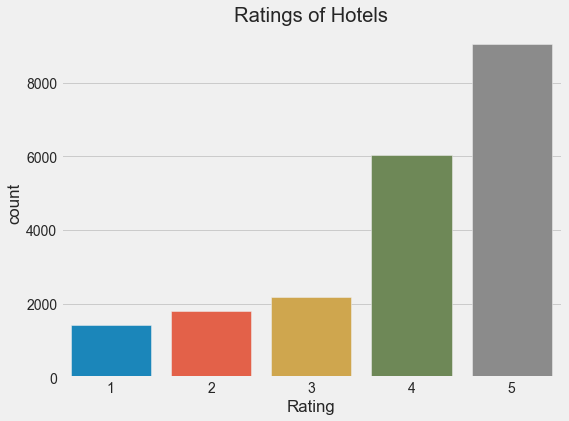

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(df["Rating"])
plt.title("Ratings of Hotels")


From the above graph, we can see that most of the customer rating is within the positive zone (high = 4-5). This leads us to believe that most reviews will be pretty positive too, which will be analyzed in a while.Now, we can create some wordclouds to see the most frequently used words in the reviews.



<AxesSubplot:>

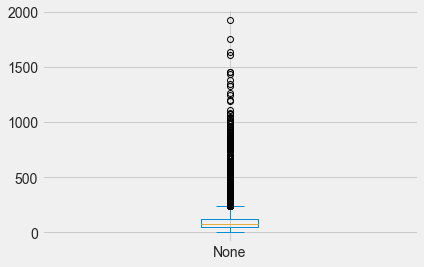

In [9]:
# Calculate review lengths
review_len = pd.Series([len(review.split()) for review in df['Review']])

# The distribution of review text lengths
review_len.plot(kind='box')


<AxesSubplot:ylabel='Count'>

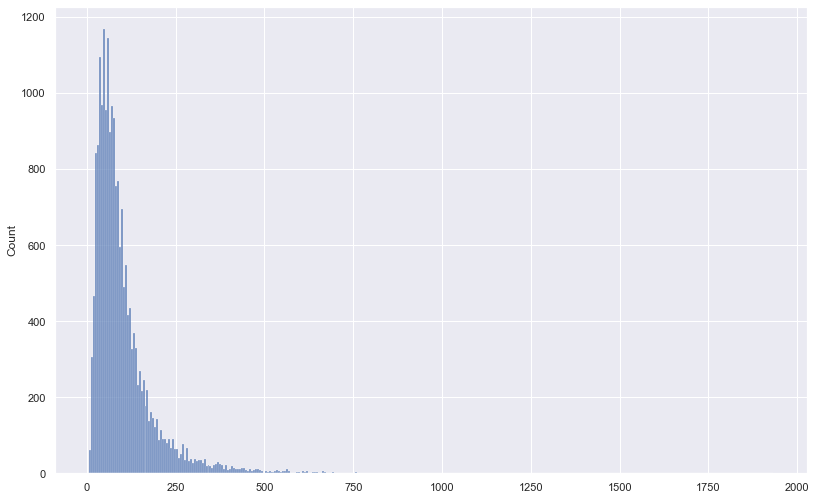

In [10]:
sns.set_theme(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None,
)
plt.figure(figsize=(12,8))
sns.histplot(review_len)


count    9054.000000
mean       93.963773
std        90.977999
min         7.000000
25%        44.000000
50%        69.000000
75%       111.000000
max      1755.000000
Name: Length, dtype: float64

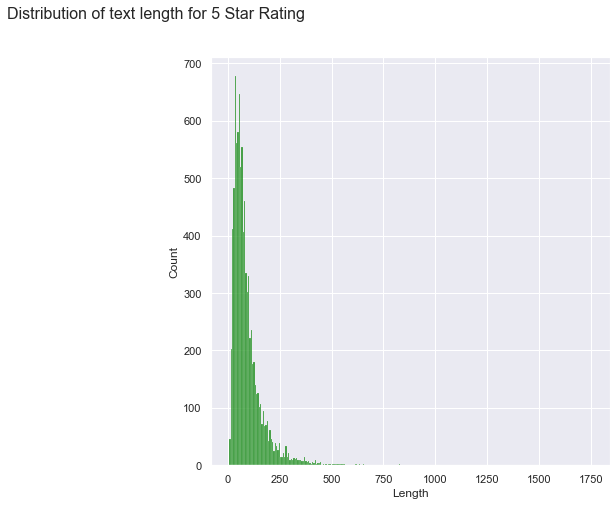

In [11]:
fig = plt.figure(figsize=(14,7))
df["Length"] = df.Review.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['Rating']==5]['Length'], ax=ax1,color='green')
fig.suptitle('Distribution of text length for 5 Star Rating', fontsize=16)
display(df.Length[df.Rating==5].describe())


count    1421.000000
mean      112.365236
std        99.834855
min        12.000000
25%        51.000000
50%        82.000000
75%       137.000000
max       954.000000
Name: Length, dtype: float64

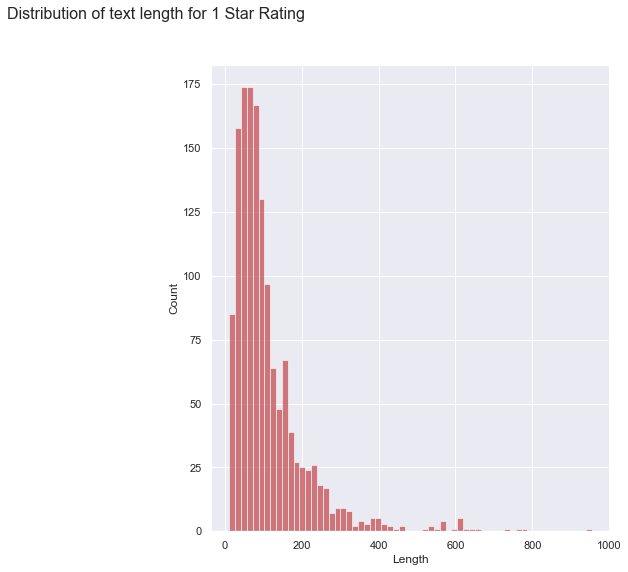

In [12]:
fig2 = plt.figure(figsize=(14,8))
ax2 = fig2.add_subplot(122)
sns.histplot(df[df["Rating"]==1]["Length"],ax=ax2,color='r')
fig2.suptitle("Distribution of text length for 1 Star Rating",fontsize=16)
display(df.Length[df.Rating==1].describe())


# WordCloud


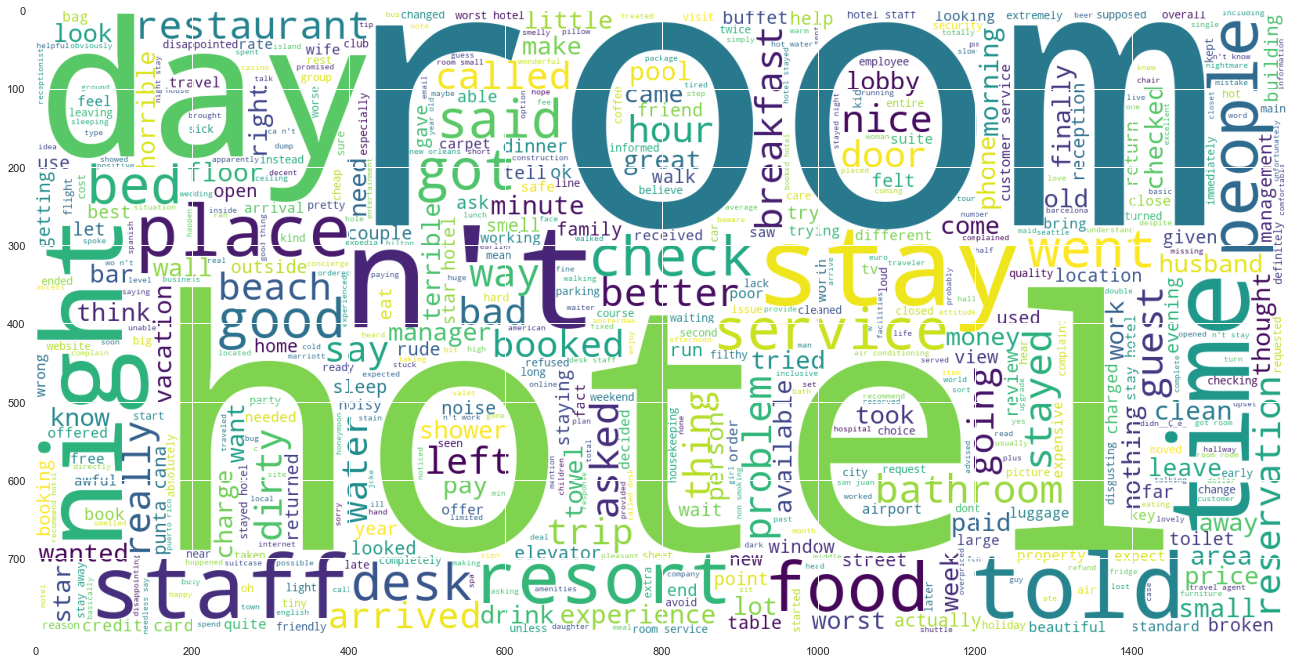

In [13]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc1 = WordCloud(max_words=2000, min_font_size=10, 
                height=800,width=1600,background_color="white").generate(" ".join(df[df["Rating"]==1].Review))
plt.imshow(wc1)


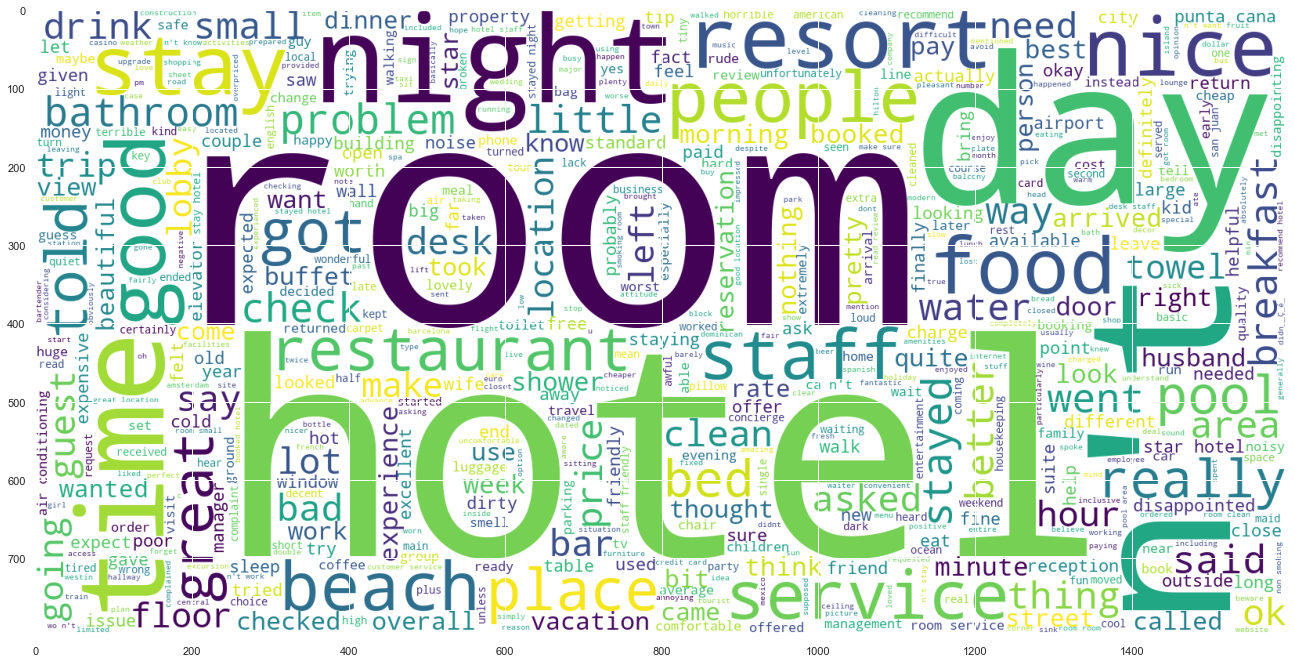

In [14]:
plt.figure(figsize=(20,20))
wc2 = WordCloud(max_words=2000, min_font_size=10, 
                height=800,width=1600,background_color="white").generate(" ".join(df[df["Rating"]==2].Review))
plt.imshow(wc2)


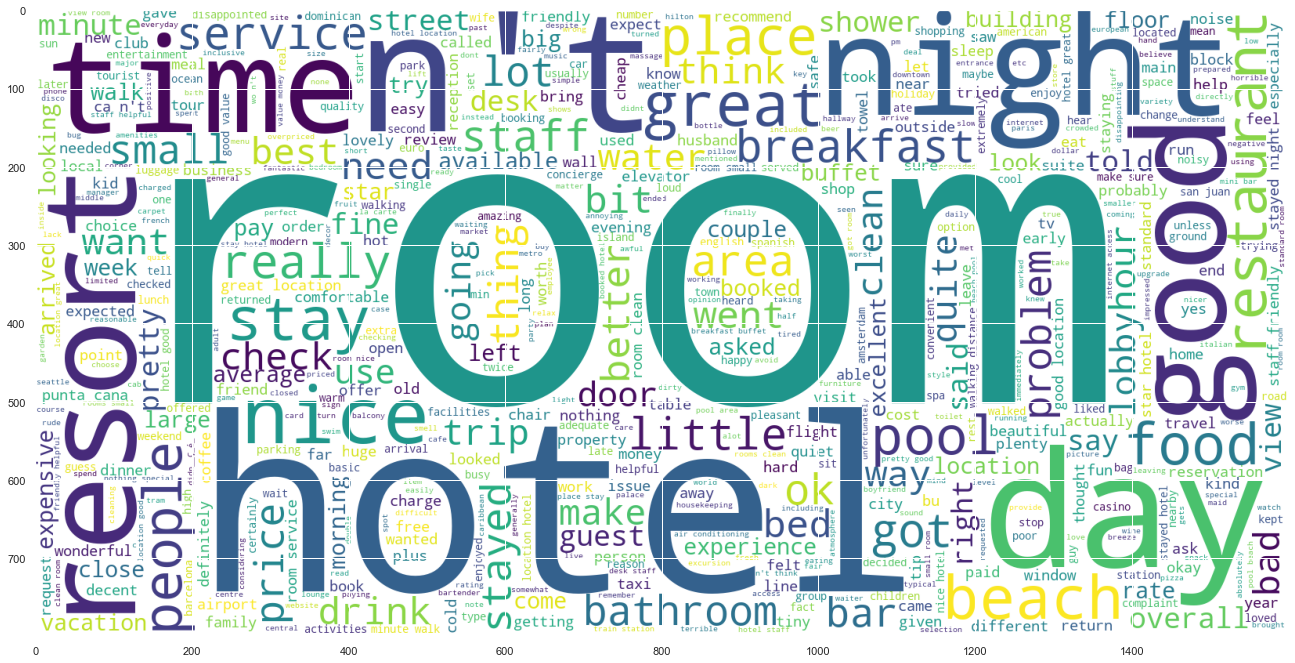

In [15]:
plt.figure(figsize=(20,20))
wc3 = WordCloud(max_words=2000, min_font_size=10, 
                height=800,width=1600,background_color="white").generate(" ".join(df[df["Rating"]==3].Review))
plt.imshow(wc3)



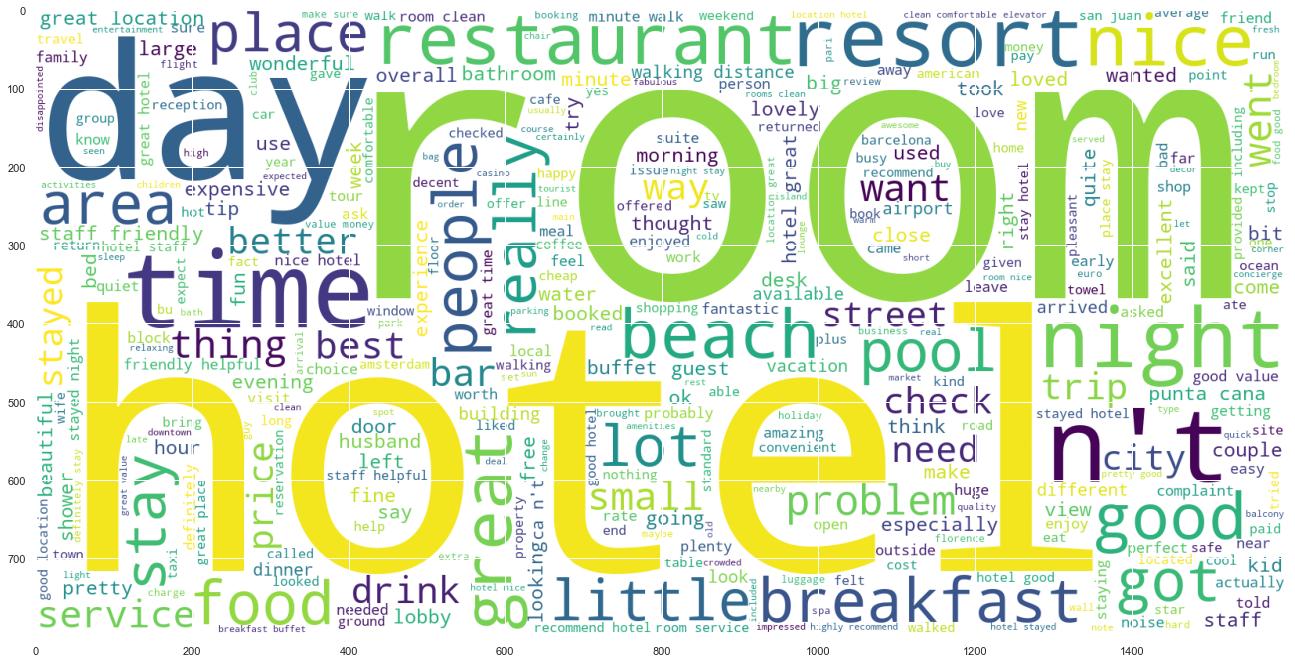

In [16]:
plt.figure(figsize=(20,20))
wc4 = WordCloud(max_words=2000, min_font_size=10, 
                height=800,width=1600,background_color="white").generate(" ".join(df[df["Rating"]==4].Review))
plt.imshow(wc4)


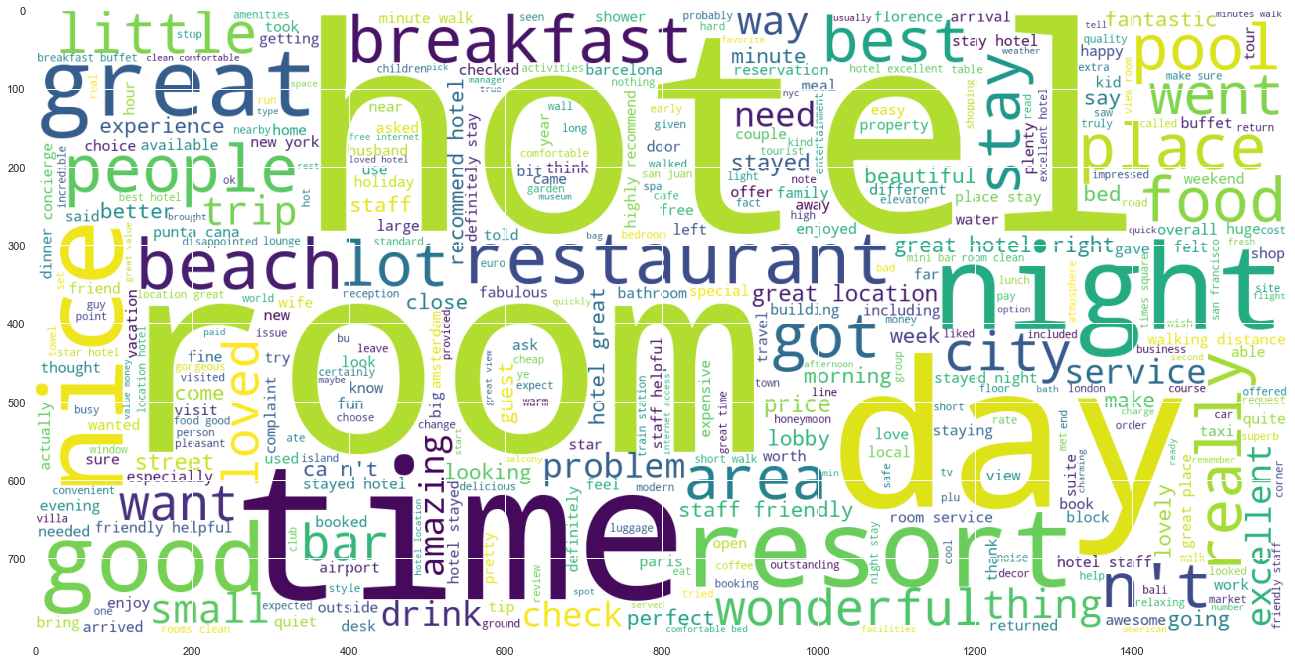

In [17]:
plt.figure(figsize=(20,20))
wc5 = WordCloud(max_words=2000, min_font_size=10, 
                height=800,width=1600,background_color="white").generate(" ".join(df[df["Rating"]==5].Review))
plt.imshow(wc5)
